<a href="https://colab.research.google.com/github/powerSeries/NN-projects/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abbreviated data preparation for the Wine Quality Problem (Project 1)

In [1]:
# Import Required Libraries  
import matplotlib.pyplot as plt 
import numpy as np 
# This time we need to also import pandas
import pandas as pd 

# Read in white wine data 
# USES PANDAS (pd) to create a PANDAS DataFrame OBJECT:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';') 

# Read in red wine data 
# USES PANDAS (pd) to create a PANDAS DataFrame OBJECT:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';') 

# Add `type` column to `red` with price one  - done with PANDAS
red['type'] = 1
  
# Add `type` column to `white` with price zero - done with PANDAS 
white['type'] = 0
  
# Append `white` to `red` - done with PANDAS
# AFTER THIS WE HAVE ALL WINES (red and white) in a SINGLE pandas DataFrame
wines = red.append(white, ignore_index = True) 

# Import SKLEARN
import sklearn
# Import `train_test_split` from `sklearn.model_selection` 
from sklearn.model_selection import train_test_split 

# Specify the  data - 
X1 = wines.iloc[:, 0:11]
X2 = wines.iloc[:,12]
X = pd.concat([X1,X2],axis = 1)

# Specify the QUALITY target labels and flatten the array 
y = np.ravel(wines.quality) 

# Splitting the data set for training and validating  - Done with SKLEARN
X_train, X_valid, y_train, y_valid = train_test_split( 
                 X, y, test_size = 0.25, random_state = 45) 


In [2]:
# CONVERTING X_train & X_test DataFrame s to TF tensors
# Will USE NumPy, TF & Keras after this
# import tensorflow as tf 

Xtrain = X_train.to_numpy()
X_valid = X_valid.to_numpy()

In [3]:
# In reality:
# [1] ALL THE Xtrain patterns (with their y_train targets) 
# will be used for TRAINING ([TR]), as Xtrain & y_train
# [2] MOST OF THE X_valid patterns (and their y_valid targets) 
#  will be used for VALIDATION ([TT]),  as X_val & y_val
# BUT WE WILL SET ASIDE THE LAST 10 for "testing" ([TS])
#  as X_tst & y_tst

In [4]:
# To separate the last 10 in X_valid, let's first see the shape of X_valid
X_valid.shape

(1625, 12)

In [5]:
# And verify also the shape of y_valid
y_valid.shape

(1625,)

In [6]:
# Retain the first 1615 for validation ([TT])
Xval = X_valid[:1615]
Xval.shape

(1615, 12)

In [7]:
# and now set aside the last 10 for "test"
Xtst = X_valid[1615:]
Xtst.shape

(10, 12)

In [8]:
# SAME FOR THE CORRESPONDING TARGETS
# Retain the first 1615 for validation ([TT])
y_val = y_valid[:1615]
y_val.shape

(1615,)

In [9]:
y_tst = y_valid[1615:]
y_tst.shape

(10,)

In [10]:
y_tst

array([5, 5, 7, 6, 5, 5, 6, 6, 7, 6])

In [11]:
 # NOW, IN ADDITION, CREATE THE TARGETS AS ONE-HOT-ENCODED 4 quality LEVELS

In [12]:
# We will track these few targets through the conversion process
y_train[272:283]

array([5, 4, 6, 5, 5, 6, 7, 6, 5, 8, 5])

In [13]:
# Function create rank-1 arrays where 3,4,5,6,7,8,9 are mapped to 1 or 2 or 3 or 4 
def to_4cs(x):
  lx = len(x)
  results = np.zeros(lx)
  for i in range(lx):
      # print( "start")
      xa = x[i];
      if xa <= 3:
          results[i] = 1      # 1, 2 and 3 map to Q-LEVEL 1 ( BAD Wine)
      elif xa <=6:
          results[i] = 2      # 4, 5 and 6 map to Q-LEVEL 2  (MEDIUM Wine)
      elif xa <=8:
          results[i] = 3      # 7 and 8 and 6 map to Q-LEVEL 3  (GOOD Wine)
      else:
          results[i] = 4      # 9 and above map to Q-LEVEL 4  (EXCELLENT Wine)
    # results[i, label] = 1.
  results = results.astype(int)
  return results

In [14]:
train_labels = to_4cs(y_train)
val_labels = to_4cs(y_val)
tst_labels = to_4cs(y_tst)

In [15]:

# Let's verify that the trainnig targets that we are tracking
# were converted to levels (1 = BAD; 2 = MEDIUM; 3 = GOOD; 4- EXCELLENT) correctly:
train_labels[272:283]

array([2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2])

In [16]:
# NOW, ONE-HOT ENCODING OF ALL 3  TARGET ARRAYS
# define a function to do the one-hot-encoding of output labels

def to_one_hot(labels, dimension=4):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels-1):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_val_labels = to_one_hot(val_labels)
one_hot_tst_labels = to_one_hot(tst_labels)

In [17]:
#Let's verify that the training targets we have tracked were
# one-hot encoded correctly
one_hot_train_labels[272:283,]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [18]:
# SO, AFTER EXECUTING THIS CELL, YOU WILL HAVE:
# FOR TRAINING:
#  Xtrain (4872, 12)...y_train (4872,)...train_labels(4872,)....one_hot_train_labels (4872,4)
# FOR VALIDATING:
#  Xval (1615, 12)...y_val (1615,)...val_labels(1615,)...one_hot_val_labels (1615,4)
# FOR TESTING:
#  Xtst (10, 12)...y_tst (10,)...tst_labels(10,)... one_hot_tst_labels (10,4)
# PLEASE DO NOT CHANGE THE NAMES OF THESE VARIABLES (So that instructor can use them)

 ++++  END OF THE DATA PREPARATION PART ++++ 


# Part 2: Regression Model

### Regression Model 1

In [24]:
# import libraries
from tensorflow import keras
from tensorflow.keras import layers

def build_regmodl1():
  regmodl1 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1),
  ])
  regmodl1.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return regmodl1

# Builld the model
regmod1 = build_regmodl1()

# Run fit and store data
history = regmod1.fit(x=Xtrain, y=train_labels, epochs=100, verbose=2)

# Execute validation
loss, mae = regmod1.evaluate(x=Xval, y=val_labels)

# Show Model Summary
regmod1.summary()

Epoch 1/100
153/153 - 1s - loss: 3.1051 - mae: 1.2987 - 777ms/epoch - 5ms/step
Epoch 2/100
153/153 - 0s - loss: 1.8083 - mae: 1.1024 - 237ms/epoch - 2ms/step
Epoch 3/100
153/153 - 0s - loss: 1.1666 - mae: 0.8814 - 238ms/epoch - 2ms/step
Epoch 4/100
153/153 - 0s - loss: 0.8664 - mae: 0.7298 - 216ms/epoch - 1ms/step
Epoch 5/100
153/153 - 0s - loss: 0.6306 - mae: 0.6200 - 224ms/epoch - 1ms/step
Epoch 6/100
153/153 - 0s - loss: 0.5009 - mae: 0.5676 - 223ms/epoch - 1ms/step
Epoch 7/100
153/153 - 0s - loss: 0.4278 - mae: 0.5028 - 227ms/epoch - 1ms/step
Epoch 8/100
153/153 - 0s - loss: 0.3565 - mae: 0.4573 - 232ms/epoch - 2ms/step
Epoch 9/100
153/153 - 0s - loss: 0.3200 - mae: 0.4415 - 222ms/epoch - 1ms/step
Epoch 10/100
153/153 - 0s - loss: 0.3058 - mae: 0.4102 - 223ms/epoch - 1ms/step
Epoch 11/100
153/153 - 0s - loss: 0.2562 - mae: 0.3962 - 234ms/epoch - 2ms/step
Epoch 12/100
153/153 - 0s - loss: 0.2381 - mae: 0.3762 - 226ms/epoch - 1ms/step
Epoch 13/100
153/153 - 0s - loss: 0.2171 - mae: 0

Plotting Regression Model 1



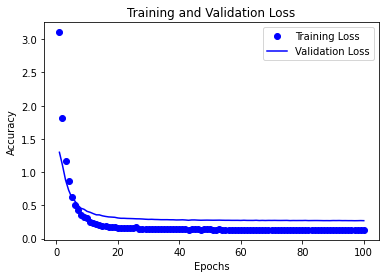

In [29]:
history_dict = history.history

# display keys
history_dict.keys()

# obtaining array of values
loss_values = history_dict["loss"]
mae_values = history_dict["mae"]

# number of epochs
epochs = range(1, len(loss_values) + 1)

# Plotting
plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, mae_values, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Regression Model 2

In [20]:
# reg mod 2
def build_regmodl2():
  model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(5, activation="relu"),
    layers.Dense(1, activation="relu"),
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model;

regmodl2 = build_regmodl2();

regmodl2_history = regmodl2.fit(x=Xtrain, y=train_labels, epochs=100, verbose=2)

regmodl2_loss, regmodl2_mae = regmodl2.evaluate(Xval, val_labels)

regmodl2.summary()

Epoch 1/100
153/153 - 1s - loss: 4.9589 - mae: 2.1901 - 1s/epoch - 7ms/step
Epoch 2/100
153/153 - 0s - loss: 4.9589 - mae: 2.1901 - 227ms/epoch - 1ms/step
Epoch 3/100
153/153 - 0s - loss: 4.9589 - mae: 2.1901 - 240ms/epoch - 2ms/step
Epoch 4/100
153/153 - 0s - loss: 4.9589 - mae: 2.1901 - 227ms/epoch - 1ms/step
Epoch 5/100
153/153 - 0s - loss: 4.9589 - mae: 2.1901 - 228ms/epoch - 1ms/step
Epoch 6/100
153/153 - 0s - loss: 4.9589 - mae: 2.1901 - 266ms/epoch - 2ms/step
Epoch 7/100
153/153 - 0s - loss: 4.9589 - mae: 2.1901 - 222ms/epoch - 1ms/step
Epoch 8/100
153/153 - 0s - loss: 4.9589 - mae: 2.1901 - 236ms/epoch - 2ms/step
Epoch 9/100
153/153 - 0s - loss: 4.9589 - mae: 2.1901 - 216ms/epoch - 1ms/step
Epoch 10/100
153/153 - 0s - loss: 4.9589 - mae: 2.1901 - 236ms/epoch - 2ms/step
Epoch 11/100
153/153 - 0s - loss: 4.9589 - mae: 2.1901 - 223ms/epoch - 1ms/step
Epoch 12/100
153/153 - 0s - loss: 4.9589 - mae: 2.1901 - 231ms/epoch - 2ms/step
Epoch 13/100
153/153 - 0s - loss: 4.9589 - mae: 2.19

### Regression Model 3

In [21]:
# reg mod 3
def build_regmodl3():
  model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(125, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(5, activation="relu"),
    layers.Dense(1)                    
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model;

  regmodl3 = build_regmodl3()

### Plotting Regression Models